In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 

# Exercise H0.1

In [2]:
samples = 100

In [3]:
gauss = lambda x, mu, sigma: (1/(sigma*np.sqrt(2*np.pi))) * np.exp((-1/2)*((x-mu)/sigma)**2)

a.)

In [4]:
x = np.linspace(-8,8, samples, endpoint=True)
y = [gauss(a, 0, 1) for a in x]

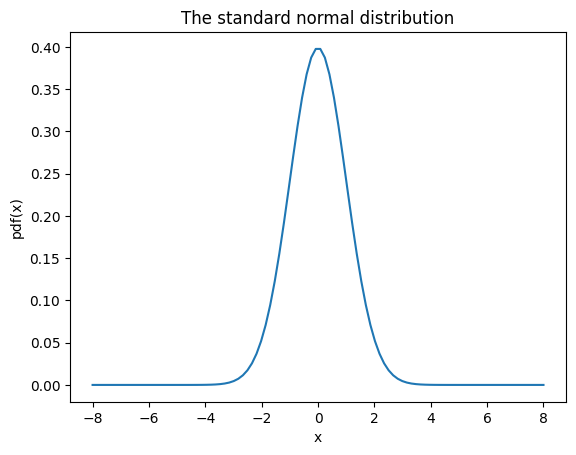

In [5]:
ax = plt.axes()
ax.plot(x, y)
_ = ax.set(xlabel='x', ylabel='pdf(x)', title='The standard normal distribution')

b.)

In [6]:
gaussBi = lambda x,y: (1/(2*np.pi)) * np.exp((-1/2)*(x**2+y**2))

gaussBi(0,2)

0.021539279301848627

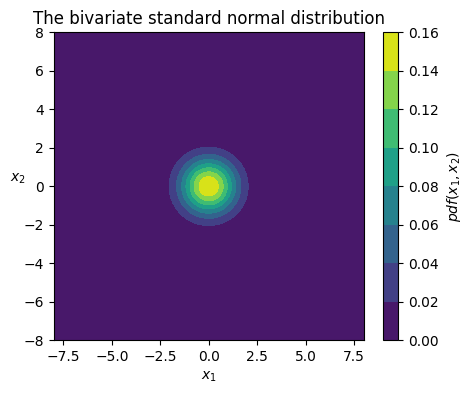

In [7]:
x = y = np.linspace(-8, 8, 100, endpoint=True)

xv, yv = np.meshgrid(x, y)
z = gaussBi(xv, yv)


plt.figure(figsize=(5,4))
plt.contourf(x,y,z)

colorBar = plt.colorbar()
colorBar.set_label('$pdf(x_1,x_2)$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$', rotation='horizontal')
plt.title('The bivariate standard normal distribution')

plt.show()

# Exercise H0.1

a.)

In [8]:
samples = np.genfromtxt('applesOranges.csv', delimiter=',', skip_header=1)

b.)

Text(0.5, 1.0, 'Comparing apples and oranges')

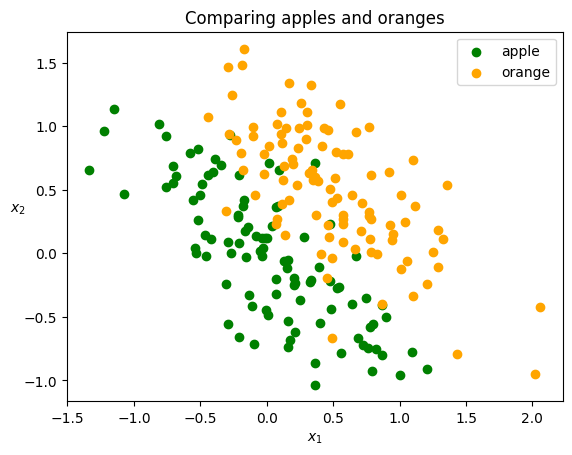

In [9]:
apples = [samples[samples[:, 2] == 0, 0], samples[samples[:, 2] == 0, 1]]
oranges = [samples[samples[:, 2] == 1, 0], samples[samples[:, 2] == 1, 1]]


plt.figure()
plt.scatter(apples[0], apples[1], c='green', label='apple')
plt.scatter(oranges[0], oranges[1], c='orange', label='orange')
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$', rotation='horizontal')
plt.title('Comparing apples and oranges')

c.)

In [10]:
H_apples, xedges_apples, yedges_apples = np.histogram2d(apples[0], apples[1], 10, density=False)
H_oranges, xedges_oranges, yedges_oranges = np.histogram2d(oranges[0], oranges[1], 10, density=False)

In [11]:
xApple = np.linspace(xedges_apples.min(), xedges_apples.max(), 10)
yApple = np.linspace(yedges_apples.min(), yedges_apples.max(), 10)

xOranges = np.linspace(xedges_oranges.min(), xedges_oranges.max(), 10)
yOranges = np.linspace(xedges_oranges.min(), xedges_oranges.max(), 10)

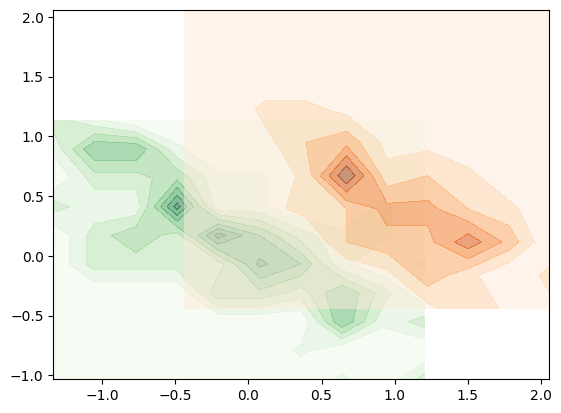

In [12]:
plt.figure()
plt.contourf(xApple, yApple, H_apples, cmap=plt.cm.Greens, alpha=0.5)
plt.contourf(xOranges, yOranges, H_oranges, cmap=plt.cm.Oranges, alpha=0.5)

# Exercise H0.3

a.)

In [13]:
X = samples[:, :2].T
l = samples[:, 2]

b.)

In [14]:
o = np.ones(200)

c.)

In [15]:
Xprime = np.vstack([o, X])

d.)

In [16]:
w = np.array([-1.05, 2.183, 2.171])

In [17]:
def calcWithMethodA(X, w):
    result = []
    for sample in X.T:
        result.append(w @ sample)
    return np.array(result)

rA = calcWithMethodA(Xprime, w)

In [18]:
def calcWithMethodB(X, w):
    result = []
    for sample in X.T:
        s = 0
        for element, factor in zip(sample, w):
            s += element * factor
        result.append(s)

    return np.array(result)   
rB = calcWithMethodB(Xprime, w)

e.)

In [19]:
rC = Xprime.T @ w

f.)

In [20]:
np.array_equal(rA,rB), np.array_equal(rA,rC), np.array_equal(rB,rC)

(False, False, False)

g.)

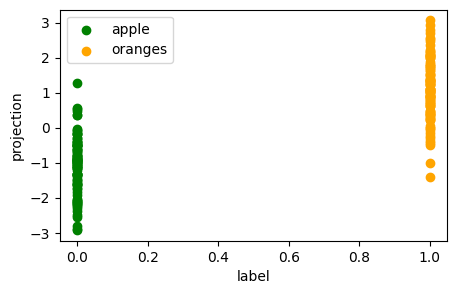

In [21]:
plt.figure(figsize=(5,3))
plt.scatter(l[l==0], rA[l==0], c='green', label='apple')
plt.scatter(l[l==1], rA[l==1], c='orange', label='oranges')

plt.xlabel('label')
plt.ylabel('projection')
plt.legend()
plt.show()

h.)

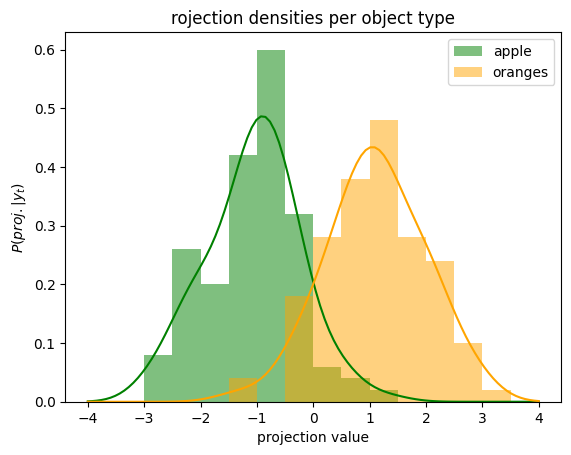

In [22]:
from sklearn.neighbors import KernelDensity

plt.hist(rA[l==0], np.arange(-4, 4.1, 0.5), color='green', label='apple', density=True, alpha=0.5)
plt.hist(rA[l==1], np.arange(-4, 4.1, 0.5), color='orange', label='oranges', density=True, alpha=0.5)

x_d = np.linspace(-4, 4, 100)
def estimateDensity(X):
    kde = KernelDensity(bandwidth=0.4, kernel='gaussian')
    kde.fit(X[:, None])

    logprob = kde.score_samples(x_d[:, None])
    
    return np.exp(logprob)

densityApple = estimateDensity(rA[l==0]) 
densityOrange = estimateDensity(rA[l==1]) 
plt.plot(x_d, densityApple, color='green', alpha=1)
plt.plot(x_d, densityOrange, color='orange', alpha=1)


plt.xlabel('projection value')
plt.ylabel('$P(proj.|y_t)$')
plt.legend()
plt.title('rojection densities per object type')
plt.show()

# Exercise H.04

a.)

In [23]:
pic = plt.imread('natIMG.jpg')

print(pic.shape)
print(pic)

(256, 512)
[[159 147 149 ... 149 143 122]
 [157 143 143 ... 123 142 139]
 [140 144 158 ... 110 123 126]
 ...
 [ 99  70  76 ... 100 102 132]
 [ 71  62  74 ... 104 107 140]
 [128 132 142 ... 105 108 147]]


b.)

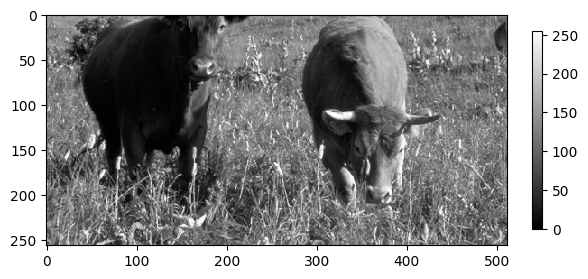

In [24]:
plt.imshow(pic, cmap='gray', interpolation='None')
plt.colorbar(fraction=0.02)
plt.show()

c.)

In [25]:
from  numpy.lib.stride_tricks import sliding_window_view 

In [26]:
H = np.array([[-1, 0, 1],
              [-2, 0, 2],
              [-1, 0, 1]])

In [27]:
pic

array([[159, 147, 149, ..., 149, 143, 122],
       [157, 143, 143, ..., 123, 142, 139],
       [140, 144, 158, ..., 110, 123, 126],
       ...,
       [ 99,  70,  76, ..., 100, 102, 132],
       [ 71,  62,  74, ..., 104, 107, 140],
       [128, 132, 142, ..., 105, 108, 147]], dtype=uint8)

In [28]:
H = np.array([[-1, 0, 1],
              [-2, 0, 2],
              [-1, 0, 1]])

sw = sliding_window_view(pic, (3,3))
sw = np.pad(sw, [[1,1], [1,1], [0,0], [0,0]], mode='edge')

sw = sw/255
sw[10][10]

array([[0.74901961, 0.63137255, 0.61960784],
       [0.6       , 0.60784314, 0.61960784],
       [0.58039216, 0.59607843, 0.60392157]])

d.)

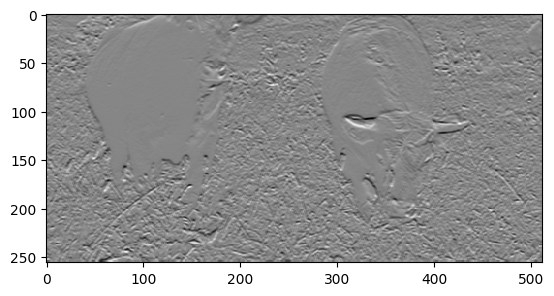

In [29]:
r = (H @ sw).sum(2).sum(2)
r *= -1 # why do I need to invert?
plt.imshow(r, cmap='gray', interpolation='None')

e.)

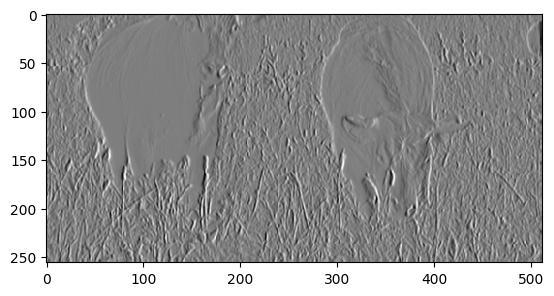

In [30]:
r = (sw @ H.T).sum(2).sum(2) # why do I need to swap the order of sw and H.T?
r *= -1 # why do I need to invert?
plt.imshow(r, cmap='gray', interpolation='None')